In [1]:
!pip install transformers==4.41.2

In [2]:
import torch
from transformers import AutoProcessor, Blip2ForConditionalGeneration

In [3]:
# -- Load processor and main model
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
# -- Send the model to GPU to speed up inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [5]:
print(model.vision_model) # Vision model in BLIP-2

Blip2VisionModel(
  (embeddings): Blip2VisionEmbeddings(
    (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
  )
  (encoder): Blip2Encoder(
    (layers): ModuleList(
      (0-38): 39 x Blip2EncoderLayer(
        (self_attn): Blip2Attention(
          (dropout): Dropout(p=0.0, inplace=False)
          (qkv): Linear(in_features=1408, out_features=4224, bias=True)
          (projection): Linear(in_features=1408, out_features=1408, bias=True)
        )
        (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        (mlp): Blip2MLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1408, out_features=6144, bias=True)
          (fc2): Linear(in_features=6144, out_features=1408, bias=True)
        )
        (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
)


In [6]:
print(model.language_model) # LLM in BLIP-2

OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 2560, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 2560)
      (final_layer_norm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0-31): 32 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (out_proj): Linear(in_features=2560, out_features=2560, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear(in_features=10240, out_features=2560, bias=True)
          (final_layer_norm): Laye

## Preprocessing Images

In [29]:
!wget -O supercar_on_the_road.png https://as1.ftcdn.net/v2/jpg/06/74/14/04/1000_F_674140405_Q9vJwhAeXRIeISYSTzFvgObwI5f223ae.jpg

--2024-06-24 05:31:17--  https://as1.ftcdn.net/v2/jpg/06/74/14/04/1000_F_674140405_Q9vJwhAeXRIeISYSTzFvgObwI5f223ae.jpg
Resolving as1.ftcdn.net (as1.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to as1.ftcdn.net (as1.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220413 (215K) [image/jpeg]
Saving to: ‘supercar_on_the_road.png’

supercar_on_the_roa 100%[===================>] 215.25K  --.-KB/s    in 0.04s   

2024-06-24 05:31:18 (5.16 MB/s) - ‘supercar_on_the_road.png’ saved [220413/220413]



* [image resource](https://stock.adobe.com/search/images?k=sports+car+with+sunset&asset_id=674140405)

In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

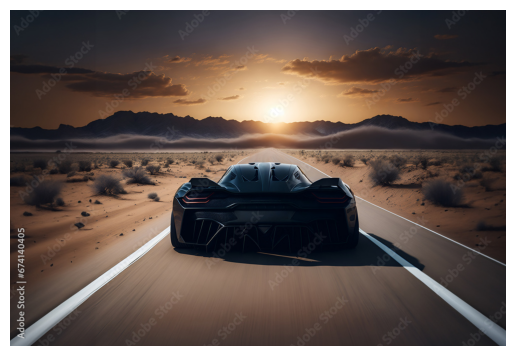

In [31]:
image = Image.open('./supercar_on_the_road.png').convert(mode='RGB')

# -- Show
plt.imshow(image)
plt.axis('off')
plt.show()

In [32]:
np.array(image).shape  # (H,W,C)

(678, 1000, 3)

In [33]:
# -- pass the original image to the processor
#    so that the image can be processed to the shape the model expects
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

for key, value in inputs.items():
    print(f"{key}: {value.shape}")  # (B,C,H,W)

pixel_values: torch.Size([1, 3, 224, 224])


## Preprocessing Text

In [34]:
print(processor.tokenizer)

GPT2TokenizerFast(name_or_path='Salesforce/blip2-opt-2.7b', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}


In [35]:
# -- Preprocess the text
text = "Her vocalization was remarkably melodic"
token_ids = processor(image, text=text, return_tensors="pt").to(device, torch.float16)["input_ids"][0]

print(token_ids)

tensor([    2, 13584,  7578,  1938,    21, 20635, 15352, 30054],
       device='cuda:0')


In [36]:
# -- Convert input ids back to tokens
tokens = processor.tokenizer.convert_ids_to_tokens(token_ids)
print(tokens)

['</s>', 'Her', 'Ġvocal', 'ization', 'Ġwas', 'Ġremarkably', 'Ġmel', 'odic']


In [37]:
tokens = [token.replace("Ġ", "_") for token in tokens]
print(tokens)

['</s>', 'Her', '_vocal', 'ization', '_was', '_remarkably', '_mel', 'odic']


# Use Case1: Image Captioning
```python
# Load an image
image = Image.open(<img_path>).convert("RGB")

# Generate caption
inputs = processor(image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

```

In [38]:
# -- Convert an image into inputs and preprocess it
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

for key, value in inputs.items():
    print(f"{key}: {value.shape}")  # (B,C,H,W)

pixel_values: torch.Size([1, 3, 224, 224])


In [39]:
# -- Generate token_ids using the full BLIP-2 model
#    image-to-token
generated_ids = model.generate(**inputs, max_new_tokens=20)

print(generated_ids)

Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


tensor([[    2,   102,   909,  1612,   512,  1428,    15,     5, 10348,    23,
         18820, 50118]], device='cuda:0')


In [41]:
# -- Convert the token_ids to text
#    token-to-text
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

print(f"Generate caption: {generated_text}")

Generate caption: a black sports car driving on the desert at sunset


Another example

In [42]:
!wget -O puppy_with_snow.png https://i.pinimg.com/736x/86/ef/d4/86efd4dfa0f27885baf11c629f3007b5.jpg

--2024-06-24 05:40:37--  https://i.pinimg.com/736x/86/ef/d4/86efd4dfa0f27885baf11c629f3007b5.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.199.34.112, 23.199.34.114, 2600:1417:76::17d2:d720, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.199.34.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75023 (73K) [image/jpeg]
Saving to: ‘puppy_with_snow.png’

puppy_with_snow.png 100%[===================>]  73.26K  --.-KB/s    in 0.01s   

2024-06-24 05:40:37 (7.24 MB/s) - ‘puppy_with_snow.png’ saved [75023/75023]



In [46]:
# -- Load image
image = Image.open('./puppy_with_snow.png').convert(mode='RGB')

# -- Generate caption
inputs = processor(image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


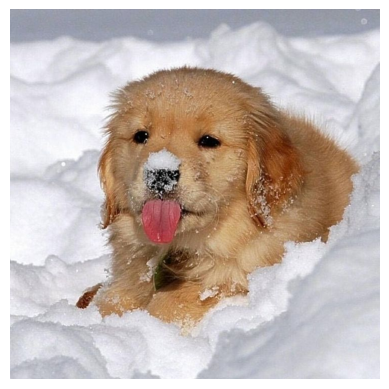

Generate caption: a golden retriever puppy is laying in the snow


In [45]:
# -- Show
plt.imshow(image)
plt.axis('off')
plt.show()

print(f"Generate caption: {generated_text}")

# Use Case2: Multimodal Chat-based Prompting (a.k.a., VQA)


## Baseline

```python
# Load an image
image = Image.open(<img_path>).convert("RGB")

# Prompt
prompt = "Question: Write down what you see in this picture. Answer:"

# VQA
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=30)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
```

In [54]:
# -- Load an image and process it
image = Image.open('./supercar_on_the_road.png').convert(mode='RGB')
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

In [55]:
# -- Visual Question Answering
prompt = "Question: Write down what you see in this picture. Answer:"

# -- Process both the image and the prompt
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

# -- Generate text
generated_ids = model.generate(**inputs, max_new_tokens=30)  # image_to_token
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip() # token_to_text

Both `max_new_tokens` (=30) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


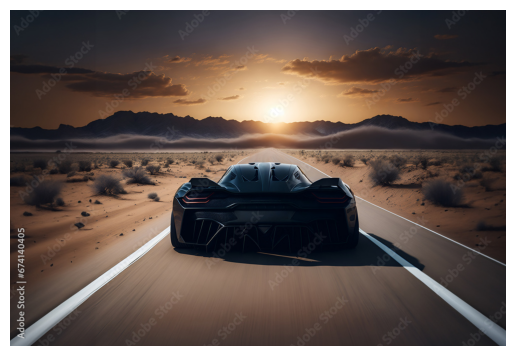

VQA: A futuristic sports car driving on a desert road


In [56]:
# -- Show
plt.imshow(image)
plt.axis('off')
plt.show()

print(f"VQA: {generated_text}")

## Chat-like prompting

In [106]:
# -- Chat-like prompting
prompt = "Question: Write down what you see in this picture. \
Answer: A sports car driving on the road at sunset. \
Question: What would it cost me to drive that car? \
Answer:"

In [107]:
# -- Generate output
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=30)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

Both `max_new_tokens` (=30) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [108]:
print(f"VQA: {generated_text}")

VQA: $1,000,000


In [140]:
# -- Chat-like prompting
question = "Can you tell me if I can buy this car?"
#question = "Can you tell me the pixel locations of this car in the picture?"

prompt = f"Question: Write down what you see in this picture. \
Answer: A sports car driving on the road at sunset. \
Question: {question} \
Answer:"

#prompt = f"Question: {question} Answer:"  # 이걸 사용하면 답변이 달라짐.

# -- Generate output
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=30)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

Both `max_new_tokens` (=30) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


* `Chat-like prompting` 인지 여부에 따라 답변이 다름

In [141]:
print(f"VQA: {generated_text}")

VQA: No, this is not a real car.


## Chat-bot

In [129]:
from IPython.display import HTML, display
import ipywidgets as widgets

In [148]:
def text_eventhandler(*args):
  question = args[0]["new"]
  if question:
    args[0]["owner"].value = ""

    # Create prompt
    if not memory:
      prompt = " Question: " + question + " Answer:"
    else:
      template = "Question: {} Answer: {}."
      prompt = " ".join([template.format(memory[i][0], memory[i][1]) for i in range(len(memory))]) + " Question: " + question + " Answer:"

    # Generate text
    inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
    generated_ids = model.generate(**inputs, max_new_tokens=100)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip().split("Question")[0]

    # Update memory
    memory.append((question, generated_text))

    # Assign to output
    output.append_display_data(HTML("<b>USER:</b> " + question))
    output.append_display_data(HTML("<b>BLIP-2:</b> " + generated_text))
    output.append_display_data(HTML("<br>"))

# Prepare widgets
in_text = widgets.Text()
in_text.continuous_update = False
in_text.observe(text_eventhandler, "value")
output = widgets.Output()
memory = []

# Display chat box
display(
    widgets.VBox(
        children=[output, in_text],
        layout=widgets.Layout(display="inline-flex", flex_flow="column-reverse"),
    )
)

Both `max_new_tokens` (=100) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=100) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=100) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=100) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both